## 简介和基础知识
## 项目：探索泰坦尼克号乘客存活情况

在 1912 年，泰坦尼克号巨轮在首次出航时撞上了冰山并沉落到海底，乘客和船员几乎无一幸免。在此引导项目中，我们将研究一小部分泰坦尼克号乘客名单，判断哪些特征最适合预测乘客是否存活下来。要完成此项目，你需要实现几个条件预测并回答下面的问题。
> **提示：**类似于此部分的引用部分可以提供关于如何浏览和使用 iPython notebook 的实用说明。

# 开始
运行以下代码单元格，加载我们的数据并使用 `.head()` 函数显示前几个条目（乘客）以进行检查。

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import visuals as vs

from copy import deepcopy

%matplotlib inline

In [2]:
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


根据泰坦尼克号样本数据，我们可以看出每位乘客包含各种特征：

| column_name | content |
| --- | --- |
| Survived | 存活结果（0 = No；1 = Yes） |
| Pclass | 社会阶层（1 = Upper class; 2 = Middle class; 3 = Lower class） |
| Name | 乘客姓名 |
| Sex | 乘客性别 |
| Age | 乘客年龄（某些条目为 `NaN`） |
| SibSp | 一起上船的兄弟姐妹和配偶人数 |
| Parch | 一起上船的父母和子女人数 |
| Ticket | 乘客的票号 |
| Fare | 乘客支付的票价 |
| Cabin | 乘客的客舱号（某些条目为 `NaN`） |
| Embarked | 乘客的登船港（C = Cherbourg; Q = Queenstown; S = Southampton） |

因为我们对每位乘客或船员的存活情况感兴趣，因此我们可以从此数据集中删除 **Survived** 特征，并将其存储在单独的变量 `outcome` 中。我们将使用这些结果作为预测目标。  

In [4]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = deepcopy(full_data['Survived'])
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


相同的泰坦尼克号样本数据现在显示 DataFrame 中删除了 **Survived** 特征。注意 `data`（乘客数据）和 `outcomes` （存活结果）现在是*成对的*。意味着对于任何乘客 `data.iloc[i, :]`，都具有存活结果 `outcomes[i]`。

要衡量预测效果，我们需要一个 __根据实际存活结果对预测进行打分的指标__ 。因为我们对预测的*准确性*感兴趣，因此我们将计算存活预测结果正确的乘客所占的比例。运行以下代码单元格以创建  `accuracy_score` 函数并对前五名乘客测试预测结果。  

**思考：** *在前五名乘客中，如果我们预测所有人都存活了，你认为我们的预测准确率是多少？*

In [5]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


# 做出预测

如果我们要对不了解其信息的任何泰坦尼克号乘客进行预测，那么我们可以进行的最可靠预测是他们没有存活。因为我们可以假设大部分乘客（超过 50%）在船沉下后未能幸存。  
下面的 `predictions_0` 函数将始终预测乘客没有存活。

In [7]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

predictions[:5]

0    0
1    0
2    0
3    0
4    0
dtype: int64

### 问题 1： 性别

* 根据泰坦尼克号数据，预测所有乘客都没存活的预测模型准确率是多少？

**提示：**运行以下代码单元格，看看该预测的准确率是多少。

In [8]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


**答案：** 61.62%.

***
我们使用 `survival_stats` 函数看看特征 **Sex** 是否对乘客的存活率有任何影响。该函数在此项目所包含的 `visuals.py` Python 脚本中进行了定义。传递给该函数的前两个参数分别是泰坦尼克号数据和乘客存活结果。第三个参数表示我们希望根据哪个特征绘制存活统计信息图表。  
运行以下代码单元格以根据他们的性别绘制乘客存活结果图表。

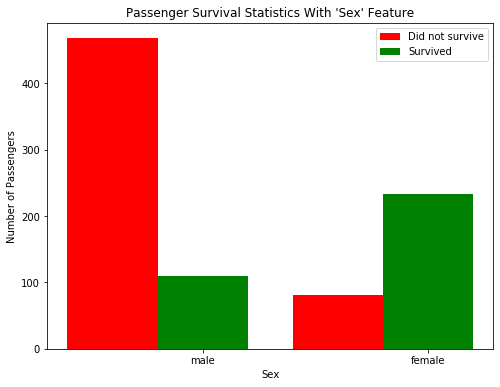

In [11]:
vs.survival_stats(data, outcomes, 'Sex')

查看存活统计数据后发现，大部分男性在沉船后没有存活下来。但是，大部分女性*的确*存活了。我们以之前的预测模型为基础重新预测： __如果乘客是女性，则预测存活了，否则没有存活。__   
请将下面缺失的代码补充完整，以便该函数能够做出这种预测。  
**提示：**你可以像字典一样访问乘客的每个特征值。例如，`passenger['Sex']` 是乘客的性别。

In [12]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == "female":
            predictions.append(1)
        else:
            predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

predictions[:5]

0    0
1    1
2    1
3    1
4    0
dtype: int64

### 问题 2：年龄

* 如果模型预测所有女性乘客都存活了，所有男性乘客没有存活，则准确率是多少？

**提示：**运行以下代码单元格，看看该预测的准确率是多少。

In [13]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


**答案**：*78.68%。*

***
如果仅使用每位乘客的 **Sex** 特征，我们能够使预测准确率显著提高。现在再使用另一个特征，看看能否进一步改善预测效果。例如，对于泰坦尼克号上的所有男性乘客，能否找到存活率更高的子集？我们先看看每位乘客的  **Age**，同样使用 `survival_stats` 函数。这次，我们将使用第四个参数过滤数据，以便仅包含 **Sex** 为 'male' 的乘客。  
运行以下代码单元格，以根据男性乘客的年龄绘制存活结果图表。

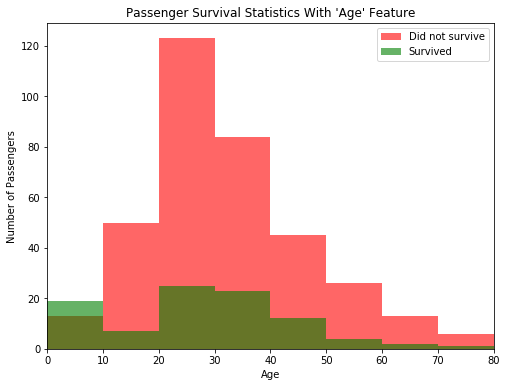

In [14]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

查看存活统计数据后发现，大部分 10 岁以下男性存活了，而大多数 10 岁及以上的男性*没有存活*。我们继续完善之前的预测模型：如果乘客是女性，则预测存活了。如果乘客是男性并且小于 10 岁，也预测存活了。其他乘客预测没有存活。  
**提示：** 你可以使用你之前编写的  `predictions_1` 中的预测代码开始实现此函数。

In [15]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == "female":
            predictions.append(1)
        elif passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

predictions[:5]

0    0
1    1
2    1
3    1
4    0
dtype: int64

### 问题 3：其他辅助条件

* 如果模型预测所有女性乘客和小于 10 岁的男性乘客都存活了，则准确率是多少？ 

**提示：** 运行以下代码单元格，看看该预测的准确率是多少。

In [16]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


**答案**： *79.35%。*

***
在 **Sex** 的基础上再添加特征 **Age** 并没有像只使用特征 **Sex** 那样能显著提高准确率。现在该你了：查找一系列特征和条件以继续拆分数据，以获得准确率至少为 80% 的结果预测模型。可能需要多个特征和多个级别的条件语句才能达到这一准确率。你可以多次使用相同的特征和不同的条件。   
建议尝试特征 **Pclass**、**Sex**、**Age**、**SibSp **和 **Parch**。

使用下面的 `survival_stats` 函数检查各种存活统计数据。  
**提示：** 要使用多个过滤条件，请将每个条件都放入一个列表中并作为最后一个参数。例如：`["Sex == 'male'", "Age < 18"]`

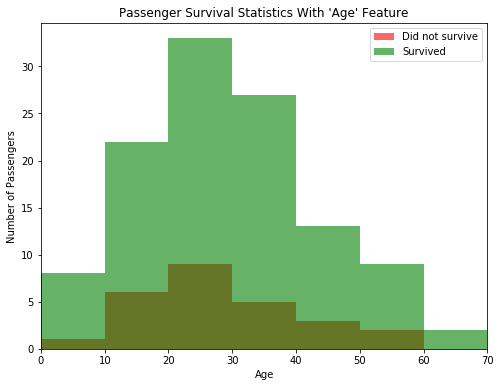

In [18]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'", 'Parch < 3', 'SibSp == 0'] )

在探索存活统计数据可视化图表后，请将下面缺失的代码补充完整，使该函数能做出相关预测。  
确保记录在实现最终预测模型之前尝试的各种特征和条件。  
**提示：** 你可以使用你之前编写的  `predictions_2` 中的预测代码开始实现此函数。

In [21]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for index, passenger in data.iterrows():
        if passenger['Sex'] == 'male':
            predictions.append(0)
        elif passenger['Pclass'] < 3:
            predictions.append(1)
        elif passenger['SibSp'] < 3:
            predictions.append(1)
        else :
            predictions.append(0)
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here     
            
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

predictions[:5]

0    0
1    1
2    1
3    1
4    0
dtype: int64

* 描述下为了实现**准确率达到 80%** 这一最终预测模型你所采取的步骤。某些特征比其他特征信息量更大吗？你使用了哪些条件来拆分数据的存活结果？你的预测准确率是多少？

**提示：** 运行以下代码单元格，看看该预测的准确率是多少。

In [14]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 80.02%.


**答案**：80.02%。

# 总结

在以迭代方式多次对数据进行探索和设置过滤条件后，你构建了一个预测每位泰坦尼克号乘客存活情况的实用算法。此项目运用的技巧是简单机器学习模型*决策树*的手动实现。决策树每次使用一个特征，将数据集拆分为越来越小的群组（称为*节点*）。    
每次拆分数据子集时，如果生成的子集比之前更同类（包含类似的标签），则预测越来越准确。使用计算机完成操作的优势是计算机的计算流程比上述手动探索更详尽、更精确。     
[此网站](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)使用决策树对机器学习进行了讲解。

*监督式学习*模型有很多种，决策树便是其中之一。在监督式学习环境中，我们尝试使用 **数据特征** 对<font color=yellow>具有客观结果标签的事物</font>进行预测或建模。也就是说，每个数据点都具有已知的结果值，例如 `'Survived'` 等离散分类标签，或预测房价的数值连续值。